## 8.3 순간 유량 근사하기
#### 시간 구간의 간격을 계속 줄여나가면서 volume 함수에 대한 평균 변화율을 계산해보면 각 순간에서 변화율을 측정한 값에 점점 다가간다.
#### 특정 순간에 부피의 평균변화율을 측정한다는 말은 순간이 시점과 종점이 같은 구간이라고 할 수도 있을 것이다.
#### 즉 t일 때의 평균 유량은 (V(t) -V(t))/(t-t) = 0 이 된다.
#### 0에서 0을 나눈 것은 정의되지 않는다. 고로 여기서는 미분적분학을 사용해야 할 것이다.
#### 미분적분학에서는 이런 정의되지 않는 나눗셈 문제를 회피해서 함수의 순간변화율을 나타내는 함수인 도함수가 있고, 도함수를 구하는 연산을 미분이라고 한다.
#### 이제 근사값을 미분적분학을 이용해 어떻게 구하는지 살펴보겠다.
#### 부피 함수 v와 시점 t를 입력으로 받아 탱크로 흘러드는 석유의 순간 유량의 근사값을 리턴하는 instantaneous_flow_rate를 작성하겠다. 이 함수의 아웃풋은 시간당 배럴 수를 나타낸다.
#### 두번째로는 get_flow_function를 만들 것이다. 이 함수는 위의 함수를 커링한다. 함수의 인자는 부피 함수이고 시간을 입력으로 받으면 순간 유량을 리턴하는 함수를 리턴한다.

---
## 8.3.1 작은 할선의 기울기 구하기


In [ ]:
from function1 import * 
# 이전에 작업했던 것들 불러오기

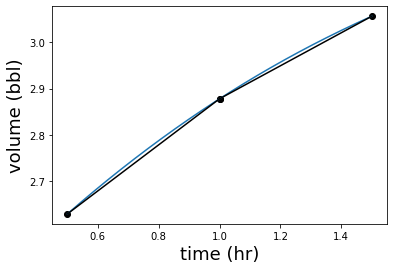

In [13]:
plot_volume(volume,0.5,1.5)
plot_secant(volume,0.5,1)
plot_secant(volume,1,1.5)

#### 이전에 할선을 그렸을때와 비교해서 생각해보자
#### 이번에 그린 할선이 조금 더 그래프와 비슷해보인다.
#### 이번에는 범위를 더 좁혀 volume 그래프를 그린뒤 할선을 그려보겠다.

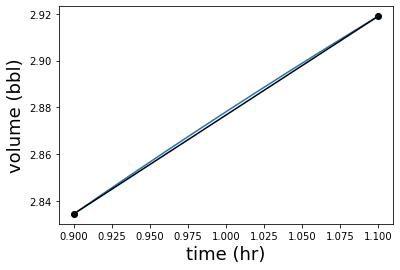

In [16]:
plot_volume(volume,0.9,1.1)
plot_secant(volume,0.9,1.1)

#### 할선과 그래프가 거의 한 직선처럼 보인다.
#### 더 범위를 좁혀서 확인하면 직선처럼 보인다.
#### 물론 이것은 실제 직선을 의미하는 것은 아니다. 하지만 확대할 수록 직선에 가깝게 보일 것이다.
#### 임의의 점에서 부피 그래프와 같은 매끈한 그래프를 가장 잘 근사하는 직선이 하나 있다는 것을 미분적분학을 통해 알 수있다.
#### 점점 작아지는 구간의 할선의 기울기가 특정한 값으로 수렴함을 보여주는 것이다.
#### 그래프외에 수렴하고 있다는 것을 계산을 통해 알아보겠다.

In [17]:
print(average_flow_rate(volume,0.5,1.5))
print(average_flow_rate(volume,0.9,1.1))
print(average_flow_rate(volume,0.99,1.01))
print(average_flow_rate(volume,0.999,1.001))
print(average_flow_rate(volume,0.9999,1.0001))
print(average_flow_rate(volume,0.99999,1.00001))

0.42578125
0.4220312499999988
0.42187656249998945
0.42187501562509583
0.42187500015393936
0.4218750000002602


#### 계산 값을 보면 계속해서 0.421875에 다가가는 것을 볼 수 있다.
#### 따라서 t = 1일때 부피 함수를 가장 잘 근사하는 직선의 기울기는 0.421875라는 결론을 얻을 수 있다.
#### 이 직선은 부피 그래프에 대한 점 t =1 에서의 접선이라고 하며, 해당 점에서 부피 그래프에 딱 붙어있다는 점에서 특별함이 있다.
#### 결론적으로 접선은 부피 그래프를 가장 잘 근사하는 직선이며 접선의 기울기는 그래프의 순간 기울기이며 t=1일 떄의 순간 유량이다.

In [18]:
flow_rate(1)
# 위에 미분해 얻은 접선의 기울기와 그래프에서의 순간 유량값과 동일함을 볼 수 있다.

0.421875

---
## 8.3.2 순간 유량함수 만들기
#### 위에 한 일련의 과정을 자동화 하는 과정을 만들어보자
#### 하지만 파이썬에서는 몇 개의 할선의 기울기를 살펴볼 수 없어 기울기가 어느 값으로 수렴하는지 알 수 있는 방법이 없다는 제약이 있다.
#### 이것을 해결하기 위해 구간의 크기를 줄여가며 정해진 자릿수에서 할선의 기울기 값 변화가 잦아들 때까지 할선의 기울기를 계산해야 한다.
#### 구간의 크기를 1/10으로 줄이면서 기울기를 계속 구하고 소숫점 4자리가 안정화 될때까지 반복하면서 기울기를 구하는 함수를 만들어보겠다.

In [29]:
def instantaneous_flow_rate(v,t,digits = 6):
    tolerance = 10**(-digits) # 두 수의 차이가 10^-6 의 범위까지 일치하는가
    h = 1
    approx = average_flow_rate(v,t-h,t+h) # 구하려는 t기준 (+,-)h 범위에서 기울기 계산
    for i in range(0,2*digits):
        h = h/10
        next_approx = average_flow_rate(v,t-h,t+h) # 기존 구간의 1/10을 해 새로운 구간 설정
        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits) # 오차가 허용 범위 내에 들어오면 반올림해서 리턴
        else:
            approx = next_approx # 오차가 허용 범위보다 큰 경우 더 작은 범위로 설정
    raise Exception("Derivative did not converge") # 2*digits의 범위내에서 결과가 나오지 않으면 이 과정에서 수렴한 결과값을 얻을 수 없음.

In [30]:
instantaneous_flow_rate(volume,1)

0.421875

---
## 8.3.3 순간 유량함수의 커링과 플로팅
#### flow_rate 함수 처럼 시간 변수를 입력으로 받아 유량을 리턴하는 함수를 만들어내려면 instantaneous_flow_rate 함수를 커링할 필요가 있다.
#### 이렇게 커링을 적용한 함수는 부피 함수 v를 입력받아 유량함수를 리턴한다.

In [31]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v,t)
    return flow_rate_function

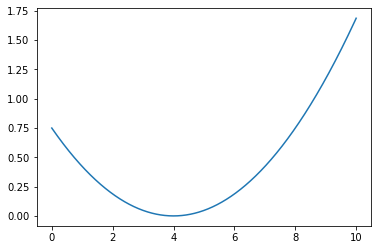

In [32]:
# 실제 flow_rate함수와 동일한 값이 나오는지 확인
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)
# 동일한 곡선으로 나옴

#### 이런 과정을 수학 분야에서는 '미분한다' 또는 '도함수를 취한다.' 라고 표현한다.
#### volume과 같은 함수가 주어질 떄 임의의 주어진 점에서 순간변화율을 알려주는 함수를 해당 함수에 대한 도함수라고 한다.
#### 도함수는 한 함수를 입력으로 받아서 해당 함수의 변화율을 측정한 다른 함수를 리턴하는 연산으로 간주할 수 있다.
#### 이번에 사용한 예시에서는 유량함수는 부피 함수의 도함수라고 할 수 있다.
#### 도함수는 모든 점에서 접선을 가질 만큼 충분히 매끈한 임의의 함수 f(x)에 대해 작용하는 일반적인 절차이다.
#### f'(x)는 x에 대한 f의 순간 변화율을 의미한다.
#### ex) f'(5)는 x = 5에서 f(x)의 미분계수이며 f의 접선의 기울기이다.
---
## 8.4 부피 변화량 근사하기
#### 이번에는 계속하던 작업을 반대로 해보겠다.
#### 함수의 변화율을 알고 있다고 가정한 뒤 원래 함수를 복원하는 작업을 한다고 생각하면 된다. 이러한 과정을 미분적분학에서는 적분이라고 한다.
---
## 8.4.1 작은 시간 구간 동안의 부피 변화량 구하기
#### 일상에서의 예시를 하나 들어보겠다.
#### 운전중 속도계를 보니 60km/h가 찍혀있었다. 2시간을 운전한 뒤 운전자는 120km를 이동했다고 이야기 할 수 있을까?
#### 이것은 정확하게 알수 없지만 120km가 아닐 확률이 매우 높을 것이다. 왜냐하면 당시의 속력은 60km/h으로 나오지만 계속해서 60km/h로 운전했는지는 모르기 때문이다.
#### 한번 60km/h가 찍힌후 1초후에는 얼마나 이동했을까?
#### 1초 동안의 이동거리는 1/60 km 정도를 이동했을 것이다.
#### 1초는 정말 짧은 시간이기 때문에 1초안에 자동차의 속력이 변화해도 이동거리에서는 크게 차이가 나지 않을 것이기 때문이다.
#### 이런 접근법을 가지고 유량과 부피로 돌아가 생각해보면 유량이 거의 일정해질 정도로 짧은 시간 폭에 대해 부피의 변화량을 구해보자
#### 시간 구간에 대한 유량은 해당 시간 구간의 평균 유량에 근사할 것이다. 고로 유량 = 평균유량 = 부피의 변화량/경과시간 이라는 식을 얻을 수 있고, 이것은 부피의 변화량 = 유량 * 경과시간으로 나타낼 수 있다.

In [33]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [34]:
print(small_volume_change(flow_rate,2,1))
print(volume(3) - volume(2))

0.1875
0.109375


#### 위에 식과 결과를 보면 flow_rate함수에서 1초간의 부피 변화량을 구한 것과 만든 식에서 나온 아웃풋의 값이 차이가 조금 발생한 것을 알 수있다.
#### 그렇다면 dt를 더 줄여 보다 짧은 시간에서의 변화량을 관측해보겠다.

In [35]:
print(small_volume_change(flow_rate,2,0.1))
print(volume(2.01) - volume(2))

0.018750000000000003
0.0018656406250001645


#### 이번에는 전보다 오차가 많이 감소한 것을 볼 수 있다.
#### 이런 결과를 기반으로 아래에서 새로운 함수를 만들어 보겠다.
---
## 8.4.2 시간을 작은 시간 구간으로 쪼개기
#### volume_change(q,t1,t2,dt)를 구현 할 것이다.
#### 실제 임의의 시간 구간에서 부피의 변화량을 계산하는 함수이며 입력 인자는 유량함수 q, 시점 t1, 종점 t2, 시간 폭 dt이 있다.
#### Numpy의 arange 함수를 사용해 t1부터 dt씩 증가하며 t2까지의 값들을 배열로 만든 후 각 부피의 변화량을 구한다. 이후 총 변화량을 알기 위해 모든 결과값을 더해주는 방법으로 함수를 만들겠다.

In [36]:
def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
              for t in np.arange(t1,t2,dt))

In [37]:
# 0부터 10시까지 0,1 단위로 나눠 부피의 변화량 계산
print(volume_change(flow_rate,0,10,0.1))
print(volume(10) - volume(0))

4.32890625
4.375


In [38]:
volume_change(flow_rate,0,10,0.0001)
# dt의 값이 작아질수록 결과값이 더 정확해진다.

4.3749531257812455

#### 도함수를 취하는 과정과 마찬가지로 간격을 점점 작게 만들수록 결과가 예상 정답에 수렴한다.
#### 변화율로부터 특정 시간 구간에서 함수의 전체 변화량을 계산하는 과정을 정적분이라고 한다.
---
## 8.4.3 유량 그래프에서 부피 변화량 구하기

---
## 8.4.5 시간에 따른 부피 플로팅하기
#### 우리의 목표는 특정 시점에 탱크 안에 유체의 총 부피를 얻는 것이다.
#### 석유가 3시간 동안 1.2배럴/h로 일정한 유량이 탱크로 흘러 들어갈 때, 3시간 뒤의 탱크안의 석유 부피는 얼마일까?
#### 3.6만큼 추가된 것은 누구나 알 수 있지만 처음에 유체의 부피를 모르기 때문에 최종적인 석유의 부피는 알 수 없을 것이다.
#### 즉 우리는 초기의 부피에다가 임의의 시간 T시일 때 부피의 변화량을 더해 T시의 총 부피를 구할 수 있던 것이다.
#### 동일한 개념을 이용해 부피 함수 approximate_volume을 만들 것이다.
---
## 8.5.1 시간에 따른 부피 구하기
